In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from keras import layers, models
import requests
from io import BytesIO
from zipfile import ZipFile
import matplotlib.pyplot as plt

In [ ]:
# Загрузка и подготовка данных
from google.colab import drive
drive.mount('/content/drive')

data_path = "/content/drive/My Drive/Project/DataSetCyrillic"

Mounted at /content/drive


In [ ]:
# размер изображений 28 на 28 => входной вектор длины 784
labels = []
images = []

for folder in os.listdir(data_path):
    for filename in os.listdir(os.path.join(data_path, folder)):
        img_path = os.path.join(data_path, folder, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img = img / 255  # Нормализация значений пикселей
        label = ord(folder[0]) - ord('А')
        images.append(img)
        labels.append(label)

In [ ]:
# Преобразование в массив numpy
images = np.array(images)
labels = np.array(labels)

In [ ]:
# Разделение данных на обучающий и тестовый наборы
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2)

In [ ]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten

In [ ]:
from tensorflow.keras.layers import Dropout

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))  # Добавлен сверточный слой
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))  # скрытый слой 128 нейронов
model.add(Dropout(0.5))  # Добавлен слой Dropout
model.add(layers.Dense(66, activation='softmax'))  # выходной 63 нейрона (33 буквы, из них все, кроме ъ, ы, ь в двух вариантах (большая и маленькая))
# 66 для краткости

print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 1600)              0         
                                                                 
 dense_8 (Dense)             (None, 128)              

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, batch_size=32, epochs=100, validation_split=0.2)

Epoch 1/100
493/493 [==============================] - 20s 39ms/step - loss: 3.9605 - accuracy: 0.0502 - val_loss: 3.5046 - val_accuracy: 0.1162
Epoch 2/100
493/493 [==============================] - 19s 38ms/step - loss: 3.2682 - accuracy: 0.1403 - val_loss: 2.7437 - val_accuracy: 0.3037
Epoch 3/100
493/493 [==============================] - 18s 37ms/step - loss: 2.7947 - accuracy: 0.2409 - val_loss: 2.3422 - val_accuracy: 0.4051
Epoch 4/100
493/493 [==============================] - 19s 38ms/step - loss: 2.4945 - accuracy: 0.3060 - val_loss: 2.0710 - val_accuracy: 0.4559
Epoch 5/100
493/493 [==============================] - 18s 37ms/step - loss: 2.2739 - accuracy: 0.3583 - val_loss: 1.9140 - val_accuracy: 0.4977
Epoch 6/100
493/493 [==============================] - 19s 39ms/step - loss: 2.1223 - accuracy: 0.3949 - val_loss: 1.7014 - val_accuracy: 0.5406
Epoch 7/100
493/493 [==============================] - 18s 37ms/step - loss: 1.9863 - accuracy: 0.4258 - val_loss: 1.6075 - val_ac

1/1 [==============================] - 0s 45ms/step
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  7.08293157e-08 1.42659854e-28 0.00000000e+00 0.00000000e+00
  1.96556143e-19 0.00000000e+00 1.12091732e-27 1.38688495e-36
  2.61771190e-25 1.97711667e-37 2.89244402e-23 6.90089588e-29
  0.00000000e+00 0.00000000e+00 9.68234461e-38 0.00000000e+00
  2.22153693e-34 0.00000000e+00 4.50574777e-09 0.00000000e+00
  5.28706014e-01 4.71282452e-01 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.15175062e-05 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  1.05017123e-29 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 2.49222961e-27 0.00000000e+00
  5.80046389e-21 0.00000000e+00 3.48743372e-32 0.00000000e+00
  3.74921760e-30 2.64147605e-17 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0

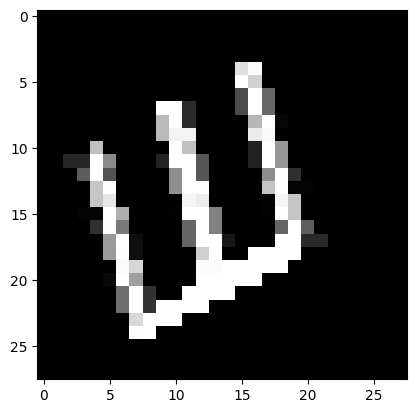

In [ ]:
n = 5
x = np.expand_dims(x_test[n], axis=0)
res = model.predict(x)
print( res )
print(f'Распознанная буква: {chr(int(np.argmax(res)) + ord("А"))}')

plt.imshow(x_test[n], cmap=plt.cm.binary)
plt.show()